# Problem Set 1 CS129.18

The following problem set will revolve around hourly Philippine weather data observations from 1978 to 2018 sourced from NOAA (National Oceanic and Atmospheric Administration). 

The dataset `PH_Weather_v1.csv` has **11** columns. The columns are described as follows.

* **datetime** maps to a YYYYMMDDSSSS string datetime format.
* **wind_direction** represents the recorded compass direction of the wind. 
* **wind_speed** is the wind speed recorded in MPH.
* **gust_speed** is the gust speed recorded in MPH. NAN if no recording.
* **sea_level_pressure** is sea level pressure in millibars estimated to the nearest tenth.
* **temperature** is the recorded temperature in celsius.
* **altitude** is the station altimeter recording in inches. NAN if no recording.
* **precipitation** is the station hourly precipitation report in inches. NAN if no recording.
* **clouds** is the station observed cloud report.
    * CLR-CLEAR 
    * SCT-SCATTERED
    * BKN-BROKEN
    * OVC-OVERCAST, 
    * OBS-OBSCURED
    * POB-PARTIAL OBSCURATION 
* **visibility** is the station observed visibility in miles
* **humidity** is the station observed relative humidity

## Requirements


>Atmospheric Science is a complex system that works with factors that interact with each other. We might be able use these variables to estimate the value of one of the key indicators: Temperature.

Using the lessons on Linear Regression I and II, and the other resource notebooks, show the following in this Jupyter Notebook.

Write your answers down as Markdown cells or comments in the code.

1. What is the dimensionality or shape of the data? ( 1pt )

2. What is mean temperature for the year 2017? ( 3pts )

3. Solve for the beta coefficients for the columns that you can use in your dataset to predict temperature. ( 4pts )

4. Show the relationship between the variable with the highest beta coefficient and temperature (Use a plot). ( 5pts )

5. Solve for the Mean Squared Error of your predicted temperature against the actual temperature. ( 2pts )

6. Solve for the R^2 score of the linear model used to predict temperature. ( 2pts )

7. Identify if the model is a good model and why. ( 3pts )



-----


Bonus 1 : What is your name?

If **you're the only one in the class** that answers Bonus 1, **only you** get **5 points**. 

If **everyone in the class** answers Bonus 1, **you all** get **0 points**.

If **no one in the class** answers Bonus 1, **everyone** gets **2 points**.

*Don't worry, your answer here will not be disclosed to the class*

----

**Submit this file on Moodle on the submission link I will provide. This is due September 13 12nn.**

In [2]:
%matplotlib inline

import matplotlib.pylab as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_csv("data/PH_Weather_v1.csv")

In [4]:
df.head()

,datetime,wind_direction,wind_speed,gust_speed,sea_level_pressure,temperature,altitude,precipitation,clouds,visibility,humidity
0,197809140300,160,2,NaN,1007.7,30,NaN,NaN,BKN,15.6,0.75
1,197810021500,0,0,NaN,1011.3,26,NaN,NaN,OVC,6.2,0.94
2,197810252100,360,9,NaN,1004.1,26,NaN,NaN,BKN,6.2,0.80
3,197810260000,360,21,NaN,1006.3,26,NaN,NaN,OVC,6.2,0.80
4,197811131500,0,0,NaN,1010.1,26,NaN,NaN,BKN,11.2,0.88


In [5]:
# df.dropna(["a", "b", "c"],axis=1)

## 1. What is the dimensionality or shape of the data? ( 1pt )
---

In [6]:
df.shape

(90565, 11)

## 2. What is mean temperature for the year 2017? ( 3pts )
---

In [7]:
df['datetime']

0        197809140300
1        197810021500
2        197810252100
3        197810260000
4        197811131500
             ...     
90560    201809010900
90561    201809011200
90562    201809011500
90563    201809011800
90564    201809012100
Name: datetime, Length: 90565, dtype: int64

In [8]:
# convert the dtypes of all entries in the datetime column 
# from 'int64' to 'datetime64[ns]'
df['conv_datetime'] = pd.to_datetime(df['datetime'].astype(str), errors='coerce')
print(df['conv_datetime'])

0       1978-09-14 03:00:00
1       1978-10-02 15:00:00
2       1978-10-25 21:00:00
3       1978-10-26 00:00:00
4       1978-11-13 15:00:00
                ...        
90560   2018-09-01 09:00:00
90561   2018-09-01 12:00:00
90562   2018-09-01 15:00:00
90563   2018-09-01 18:00:00
90564   2018-09-01 21:00:00
Name: conv_datetime, Length: 90565, dtype: datetime64[ns]


In [9]:
# check if temperature data has any NaN entries
df['altitude'].isnull().values.any()

True

In [10]:
# access all indexes within 2017
mask = (df['conv_datetime'] > '2017-01-01 00:00:00') & (df['conv_datetime'] < '2018-01-01 00:00:00')
mean = df['temperature'].loc[mask].mean()

print(df['conv_datetime'].loc[mask])
print(f'\nmean temperature for the year 2017 = {mean:.4f}')

85744   2017-01-01 03:00:00
85745   2017-01-01 06:00:00
85746   2017-01-01 09:00:00
85747   2017-01-01 12:00:00
85748   2017-01-01 15:00:00
                ...        
88634   2017-12-31 09:00:00
88635   2017-12-31 12:00:00
88636   2017-12-31 15:00:00
88637   2017-12-31 18:00:00
88638   2017-12-31 21:00:00
Name: conv_datetime, Length: 2895, dtype: datetime64[ns]

mean temperature for the year 2017 = 27.9344


## 3. Solve for the beta coefficients for the columns that you can use in your dataset to predict temperature. ( 4pts )

In [11]:
# check if precipitation data has any NaN entries
mask = df['precipitation'].notnull()
nonNullPrecipVals = df['precipitation'].loc[mask]
print(f'> Non NULL precipitation values: \n{nonNullPrecipVals}')

# check if gust_speed data has any NaN entries
mask = df['gust_speed'].notnull()
nonNullGustSpdVals = df['gust_speed'].loc[mask]
print(f'\n> Non NULL gust speed values: \n{nonNullGustSpdVals}')

# check if altitude data has any NaN entries
mask = df['altitude'].notnull()
nonNullGustSpdVals = df['gust_speed'].loc[mask]
print(f'\n> Non NULL gust speed values: \n{nonNullGustSpdVals}')

> Non NULL precipitation values: 
40710    0.04
41231    0.04
41317    1.14
41366    0.87
41564    0.04
41609    0.04
41611    0.35
41684    0.04
41685    0.28
41687    0.08
41688    0.28
41691    0.24
76072    0.04
Name: precipitation, dtype: float64

> Non NULL gust speed values: 
1324    46.0
Name: gust_speed, dtype: float64

> Non NULL gust speed values: 
Series([], Name: gust_speed, dtype: float64)


In [12]:
from sklearn.linear_model import LinearRegression

# - 'clouds' column will be dropped since the 'LinearRegression' method cannot 
#    convert string dtypes to float.
# - 'gust_speed', 'altitude', and 'precipitation' columns will also be dropped since
#   the aforementioned columns have NaN entries.
# - 'temperature' and 'conv_temperatures' will likewise be dropped since the
#   objective is to predict temperature values.

X = df.drop([
    'temperature', 
    'conv_datetime', 
    'gust_speed', 
    'precipitation',
    'altitude',
    'clouds'
    ], axis=1)
X.head()

,datetime,wind_direction,wind_speed,sea_level_pressure,visibility,humidity
0,197809140300,160,2,1007.7,15.6,0.75
1,197810021500,0,0,1011.3,6.2,0.94
2,197810252100,360,9,1004.1,6.2,0.80
3,197810260000,360,21,1006.3,6.2,0.80
4,197811131500,0,0,1010.1,11.2,0.88


In [13]:
df.head()

,datetime,wind_direction,wind_speed,gust_speed,sea_level_pressure,temperature,altitude,precipitation,clouds,visibility,humidity,conv_datetime
0,197809140300,160,2,NaN,1007.7,30,NaN,NaN,BKN,15.6,0.75,1978-09-14 03:00:00
1,197810021500,0,0,NaN,1011.3,26,NaN,NaN,OVC,6.2,0.94,1978-10-02 15:00:00
2,197810252100,360,9,NaN,1004.1,26,NaN,NaN,BKN,6.2,0.80,1978-10-25 21:00:00
3,197810260000,360,21,NaN,1006.3,26,NaN,NaN,OVC,6.2,0.80,1978-10-26 00:00:00
4,197811131500,0,0,NaN,1010.1,26,NaN,NaN,BKN,11.2,0.88,1978-11-13 15:00:00


In [14]:
# determine the set of beta coefficients that can be multiplied to each 
# row to acquire the temperature value 

linear_model = LinearRegression()
linear_model.fit(X, df["temperature"])

LinearRegression()

In [15]:
linear_model.coef_

array([ 8.74373640e-11,  1.64271890e-03,  8.70739119e-02, -1.53082516e-04,
        9.79302229e-02, -1.09202551e+01])

In [16]:
# display how many estimated coefficient values were generated and 
# visualize them against the Dataset columns

print(f'\nNumber of estimated coefficient values: {len(linear_model.coef_)}\n')
print(f"Coefficient values: {linear_model.coef_}\n")

coeffs = pd.DataFrame(list(zip(X.columns, linear_model.coef_)))
coeffs.sort_values(by=[1])


Number of estimated coefficient values: 6

Coefficient values: [ 8.74373640e-11  1.64271890e-03  8.70739119e-02 -1.53082516e-04
  9.79302229e-02 -1.09202551e+01]



,0,1
5,humidity,-1.092026e+01
3,sea_level_pressure,-1.530825e-04
0,datetime,8.743736e-11
1,wind_direction,1.642719e-03
2,wind_speed,8.707391e-02
4,visibility,9.793022e-02


## 4. Show the relationship between the variable with the highest beta coefficient and temperature (Use a plot). ( 5pts )
---

Text(0.5, 1.0, 'Relationship between humidity and Temperature')

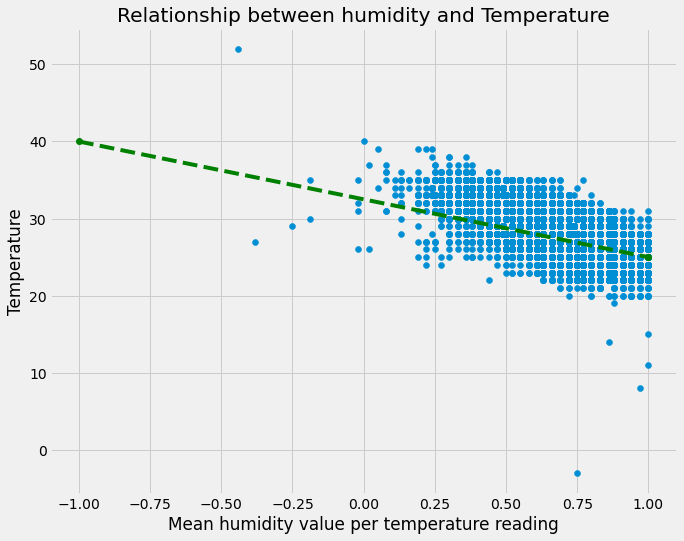

In [17]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,8))

plt.plot([-1, 1], [40, 25], '--go')
plt.scatter(df["humidity"], df["temperature"])
plt.xlabel("Mean humidity value per temperature reading")
plt.ylabel("Temperature")
plt.title("Relationship between humidity and Temperature")

In [18]:
predictions = linear_model.predict(X)
df['PRED'] = predictions

df[['temperature', 'PRED']].head()

,temperature,PRED
0,30,28.346302
1,26,24.913452
2,26,27.818454
3,26,28.863005
4,26,26.058599


Text(0.5, 1.0, 'Actual Temperature Values vs Predicted Temperature Values')

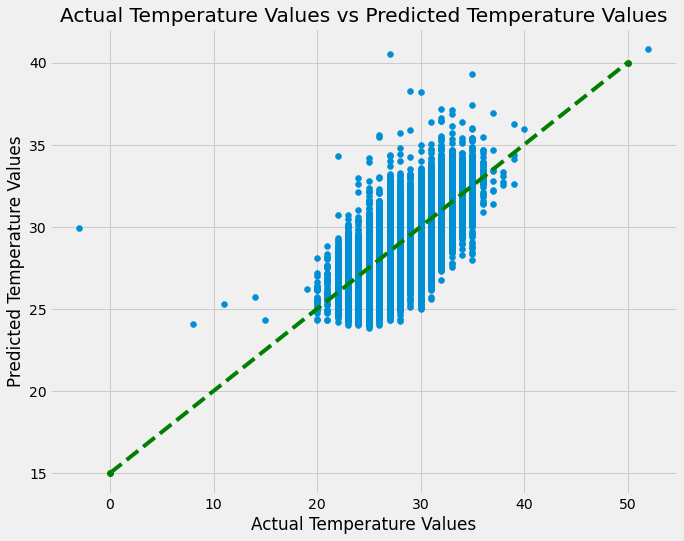

In [25]:
plt.figure(figsize=(10,8))

plt.scatter(df["temperature"], df['PRED'])
plt.plot([0, 50], [15, 40], '--go')
plt.xlabel("Actual Temperature Values")
plt.ylabel("Predicted Temperature Values")
plt.title("Actual Temperature Values vs Predicted Temperature Values")

## 5. Solve for the Mean Squared Error of your predicted temperature against the actual temperature. ( 2pts )
---
## 6. Solve for the R^2 score of the linear model used to predict temperature. ( 2pts )

In [20]:
mean_squared_error = np.mean((df["temperature"] - linear_model.predict(X))**2)
score = linear_model.score(X, df["temperature"])

print(f'\nMSE = {mean_squared_error}')
print(f'Model accuracy (R^2 score) = {score * 100}\n')


MSE = 2.760897303790201
Model accuracy (R^2 score) = 47.412273401226955



## 7. Identify if the model is a good model and why. ( 3pts )
---

Upon seeing the relatively low R^2 score, my initial reaction was to revisit the "Actual Temperature Values vs Predicted Temperature Values" scatter plot and estimate how many outliers there were. Upon inspection, I noticed that there was a very odd temperature reading that was below 0 degrees Celsuis. 

I decided to query the dataset and inspect the row which had a negative temperature reading. Upon closer inspection, I discovered that the abnormal temperature reading was logged way back in 1979.

In [21]:
mask = df['temperature'] < 0
df[['conv_datetime', 'temperature', 'PRED']].loc[mask]

,conv_datetime,temperature,PRED
482,1979-10-17 09:00:00,-3,29.901518


I then decided to inspect the dataset further and since the dataset was introduced as an "hourly Philippine weather data observations from 1978 to 2018 sourced from NOAA," I proceeded to query all of the hourly logs for that particular day to analyze the change in temperature. However, upon querying the dataset, I realized that there was only row for that entire day. As an alternative I proceeded to query the previous and succeeding days to check if there were any additional inconsistences in the dataset. 

As seen below, I was able to verify that the provided dataset had several inconsistences that affected the performance of the model. At first, I gave the dataset the benefit of the doubt since the anomaly was relatively old and several factors may have contributed to the temperature reading. I was once again proven wrong because, as seen below, the inconsistencies also extended to the tail of the dataset; the readings, at least for the late 70s, were not logged in an hourly fashion and the intervals were inconsistent and did not follow a logical pattern. 

In [22]:
mask = df['conv_datetime'] > '1979-10-01 09:00:00'
df[['conv_datetime', 'temperature', 'PRED']].loc[mask]

,conv_datetime,temperature,PRED
481,1979-10-06 00:00:00,25,25.608614
482,1979-10-17 09:00:00,-3,29.901518
483,1979-10-18 06:00:00,28,30.982496
484,1979-11-28 18:00:00,23,25.923419
485,1979-11-30 12:00:00,26,26.122862
...,...,...,...
90560,2018-09-01 09:00:00,28,26.919917
90561,2018-09-01 12:00:00,28,26.727819
90562,2018-09-01 15:00:00,27,27.382912
90563,2018-09-01 18:00:00,27,28.415428


After verifying the quality of the dataset, I plotted a boxplot of the actual and predicted temperature values to visualize the data of both columns.

It can be seen below that although inconsistent beta coefficients were fed into the model, it was still smart enough not to predict a significant amount of outlier values. It can also be observed that the number of outlier temperature values in the actual temperature readings far exceed the ones found in the 'PRED' or predicted values column. 

<AxesSubplot:>

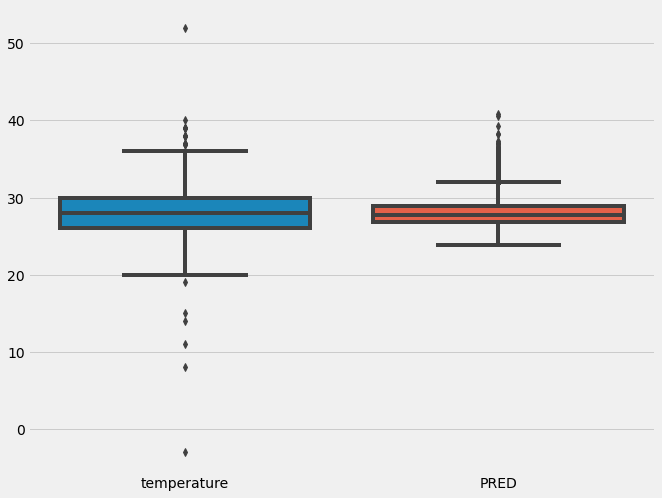

In [23]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,8))

sns.boxplot(data = df[['temperature', 'PRED']])

Upon further inspection of the scatter plot, I noticed that there was another outlier on the other side of the spectrum — a 52 degrees Celsius reading that was supposedly logged on 1982-01-05 09:00:00. 

In [24]:
mask = df['temperature'] > 50
df[['conv_datetime', 'temperature', 'PRED']].loc[mask]

,conv_datetime,temperature,PRED
1521,1982-01-05 09:00:00,52,40.827311


To add to this, not all of the columns were utilized as beta coefficients since majority of the entries in the 'precipitation' and 'gust_speed' columns were NaN, while the 'altitude' column did not have a single entry. 

Furthermore, the 'clouds' column could not be used as a beta coefficient given that the string values could not be converted into an int64 data type. Even if the station-observed cloud reports were mapped to corresponding int64 values, it would not have had any meaningful significance for the linear regression model as there would be no way of instructing the model that the said values are station-observed cloud reports. 

In conclusion, the preceding findings have revealed that the dataset is rife with disparities beyond the model's control. As a result, the model's performance was significantly affected by the outlier values. It should also be noted that linear regression, as indicated in its name, is simply a linear method that utilizes the relationship between the dependent (Y) and independent (X) values to model a best-fit line that is as close as possible to the said points. Thus, it can be established that in the context of this dataset, the linear regression model is not the ideal model that may be adopted to predict temperature values.